In [2]:
import json
import os
import requests

# Using https://open.toronto.ca/dataset/ttc-subway-delay-data/ as reference (For developers section)
# See https://docs.ckan.org/en/latest/api/index.html for more information

base_url = "https://ckan0.cf.opendata.inter.prod-toronto.ca"
url = base_url + "/api/3/action/package_show"
params = { "id": "ttc-subway-delay-data"}
package = requests.get(url, params=params).json()
# We want the XLSX and CSV files from non-datastore_active resources
resource_urls = [resource["url"] for resource in package["result"]["resources"] if resource["format"] in ['XLSX', 'CSV'] and not resource["datastore_active"]]
print('URLs filtered for csv and xlsx files:', json.dumps(resource_urls, indent=4))

URLs filtered for csv and xlsx files: [
    "https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/996cfe8d-fb35-40ce-b569-698d51fc683b/resource/3900e649-f31e-4b79-9f20-4731bbfd94f7/download/ttc-subway-delay-codes.xlsx",
    "https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/996cfe8d-fb35-40ce-b569-698d51fc683b/resource/ca43ac3d-3940-4315-889b-a9375e7b8aa4/download/ttc-subway-delay-readme.xlsx",
    "https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/996cfe8d-fb35-40ce-b569-698d51fc683b/resource/8ca4a6ed-5e7e-4b9d-b950-bf45e4b2fe20/download/ttc-subway-delay-jan-2014-april-2017.xlsx",
    "https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/996cfe8d-fb35-40ce-b569-698d51fc683b/resource/e2ee9f63-3130-4d6a-a259-ce79c9c2f1bc/download/ttc-subway-delay-may-december-2017.xlsx",
    "https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/996cfe8d-fb35-40ce-b569-698d51fc683b/resource/32bd0973-e83d-4df1-8219-c8c55cf34c6d/download/ttc-subway-delay-data-2018.xlsx",
    "https://c

In [3]:
# Create directories if they don't exist
# Note: path is relative to the path of the notebook
reference_dir = '../data/raw/reference-data'
delay_data_dir = '../data/raw/delay-data'
os.makedirs(reference_dir, exist_ok=True)
os.makedirs(delay_data_dir, exist_ok=True)


In [4]:
# Download dataset files
for url in resource_urls:
    filename = os.path.basename(url)
    if 'delay-codes' in filename or 'delay-readme' in filename:
        target_dir = reference_dir
    else:
        target_dir = delay_data_dir

    response = requests.get(url)
    file_path = os.path.join(target_dir, filename)

    if os.path.exists(file_path):
        print(f"File already exists: {file_path}")
    else:
        print(f"Saving file from {url} to {file_path}")
        with open(file_path, 'wb') as f:
            f.write(response.content)

File already exists: ../data/raw/reference-data\ttc-subway-delay-codes.xlsx
File already exists: ../data/raw/reference-data\ttc-subway-delay-readme.xlsx
File already exists: ../data/raw/delay-data\ttc-subway-delay-jan-2014-april-2017.xlsx
File already exists: ../data/raw/delay-data\ttc-subway-delay-may-december-2017.xlsx
File already exists: ../data/raw/delay-data\ttc-subway-delay-data-2018.xlsx
File already exists: ../data/raw/delay-data\ttc-subway-delay-data-2019.xlsx
File already exists: ../data/raw/delay-data\ttc-subway-delay-2020.xlsx
File already exists: ../data/raw/delay-data\ttc-subway-delay-2021.xlsx
File already exists: ../data/raw/delay-data\ttc-subway-delay-2022.xlsx
File already exists: ../data/raw/delay-data\ttc-subway-delay-2023.xlsx
File already exists: ../data/raw/delay-data\ttc-subway-delay-2024.xlsx
File already exists: ../data/raw/delay-data\ttc-subway-delay-data-since-2025.csv


In [5]:
import pandas as pd
import os

# Read each file from the delay-data directory
delay_data_dir = '../data/raw/delay-data'
dataframes = {}

# Iterate through each file in the directory
for filename in os.listdir(delay_data_dir):
    file_path = os.path.join(delay_data_dir, filename)
    
    # Check the file extension and read accordingly
    if filename.endswith('.xlsx'):
        df = pd.read_excel(file_path)
    elif filename.endswith('.csv'):
        df = pd.read_csv(file_path)
    else:
        continue  # Skip files that are not xlsx or csv

    # Store the dataframe in the dictionary with the filename as the key
    dataframes[filename] = df

In [6]:
files = [
    os.path.join(delay_data_dir, "ttc-subway-delay-2022.xlsx"),
    os.path.join(delay_data_dir, "ttc-subway-delay-2023.xlsx"),
    os.path.join(delay_data_dir, "ttc-subway-delay-2024.xlsx"),
    
]

In [7]:
import pandas as pd

# Define the file paths for the three Excel files
file_paths = [
    "../data/raw/delay-data/ttc-subway-delay-2022.xlsx",
    "../data/raw/delay-data/ttc-subway-delay-2023.xlsx",
    "../data/raw/delay-data/ttc-subway-delay-2024.xlsx"
]

# List to store DataFrames
dataframes = []

# Loop through the file paths and read each Excel file
for file in file_paths:
    df = pd.read_excel(file, engine="openpyxl")  # Ensure openpyxl is used for reading Excel
    dataframes.append(df)  # Append to list

# Merge all DataFrames into one
merged_df = pd.concat(dataframes, ignore_index=True)

# Display shape and sample data
print("Merged Data Shape:", merged_df.shape)
print(merged_df.head())

Merged Data Shape: (69311, 10)
        Date   Time       Day                 Station   Code  Min Delay  \
0 2022-01-01  15:59  Saturday   LAWRENCE EAST STATION   SRDP          0   
1 2022-01-01  02:23  Saturday      SPADINA BD STATION   MUIS          0   
2 2022-01-01  22:00  Saturday  KENNEDY SRT STATION TO    MRO          0   
3 2022-01-01  02:28  Saturday      VAUGHAN MC STATION   MUIS          0   
4 2022-01-01  02:34  Saturday        EGLINTON STATION  MUATC          0   

   Min Gap Bound Line  Vehicle  
0        0     N  SRT     3023  
1        0   NaN   BD        0  
2        0   NaN  SRT        0  
3        0   NaN   YU        0  
4        0     S   YU     5981  


In [8]:
df = merged_df
df.shape

(69311, 10)

In [9]:
# Drop rows with any missing values
df_cleaned = df.dropna()

# Display number of rows before and after cleaning
print("Rows before cleaning:", df.shape[0])
print("Rows after cleaning:", df_cleaned.shape[0])

Rows before cleaning: 69311
Rows after cleaning: 45703


In [10]:
# Remove rows where Min Delay is 0
df_cleaned = df[df["Min Delay"] > 0]
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 26606 entries, 9 to 69310
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       26606 non-null  datetime64[ns]
 1   Time       26606 non-null  object        
 2   Day        26606 non-null  object        
 3   Station    26606 non-null  object        
 4   Code       26606 non-null  object        
 5   Min Delay  26606 non-null  int64         
 6   Min Gap    26606 non-null  int64         
 7   Bound      26276 non-null  object        
 8   Line       26604 non-null  object        
 9   Vehicle    26606 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 2.2+ MB
None


In [11]:
# Summary statistics for numerical columns
summary_stats = df_cleaned.describe()

# Display summary statistics
print(summary_stats)

                                Date     Min Delay       Min Gap       Vehicle
count                          26606  26606.000000  26606.000000  26606.000000
mean   2023-07-04 17:31:39.992482816      8.101894     11.846087   5347.854619
min              2022-01-01 00:00:00      2.000000      0.000000      0.000000
25%              2022-09-26 00:00:00      3.000000      7.000000   5201.000000
50%              2023-07-05 00:00:00      5.000000      9.000000   5516.000000
75%              2024-04-12 00:00:00      8.000000     12.000000   5856.000000
max              2024-12-31 00:00:00    716.000000    719.000000   9546.000000
std                              NaN     15.602732     15.611587   1022.454277


In [12]:
# Count the number of delays per station
station_counts = df_cleaned["Station"].value_counts().head(5)  # Top 10 stations with most delays
station_counts


Station
FINCH STATION         1168
EGLINTON STATION      1062
KENNEDY BD STATION     936
KIPLING STATION        905
BLOOR STATION          804
Name: count, dtype: int64

In [13]:
import pandas as pd

# Create bins for Min Delay in 100-minute intervals
bin_edges = list(range(0, df_cleaned["Min Delay"].max() + 10, 10))
bin_labels = [f"{bin_edges[i]}-{bin_edges[i+1]-1}" for i in range(len(bin_edges)-1)]

# Categorize delays into bins
df_cleaned["Delay Band"] = pd.cut(df_cleaned["Min Delay"], bins=bin_edges, labels=bin_labels, right=False)

# Count occurrences for each delay band
delay_band_counts = df_cleaned["Delay Band"].value_counts().sort_index()

# Display the counts
print(delay_band_counts)

Delay Band
0-9        21476
10-19       3593
20-29        838
30-39        282
40-49        121
           ...  
670-679        0
680-689        0
690-699        0
700-709        0
710-719        1
Name: count, Length: 72, dtype: int64


C:\Users\ufift\AppData\Local\Temp\ipykernel_15460\776132449.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Delay Band"] = pd.cut(df_cleaned["Min Delay"], bins=bin_edges, labels=bin_labels, right=False)


In [14]:
import pandas as pd

# Count occurrences of each unique Min Delay value
min_delay_counts = df_cleaned["Min Delay"].value_counts().sort_index()

# Display the counts
print(min_delay_counts)

Min Delay
2        43
3      6703
4      4595
5      4229
6      2362
       ... 
451       1
458       1
491       1
640       1
716       1
Name: count, Length: 175, dtype: int64


In [15]:
# Create bins for Min Delay in 10-minute intervals (excluding values >100)
bin_edges = list(range(0, 101, 10))  # 10-minute bins up to 100 minutes
bin_labels = [f"{bin_edges[i]}-{bin_edges[i+1]-1}" for i in range(len(bin_edges)-1)]

# Categorize delays into bins
df_cleaned["Delay Band"] = pd.cut(df_cleaned["Min Delay"], bins=bin_edges, labels=bin_labels, right=False)

# Count occurrences for each delay band
delay_band_counts_filtered = df_cleaned["Delay Band"].value_counts().sort_index()

C:\Users\ufift\AppData\Local\Temp\ipykernel_15460\2953133821.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Delay Band"] = pd.cut(df_cleaned["Min Delay"], bins=bin_edges, labels=bin_labels, right=False)


In [16]:
print(df_cleaned.info())  # Shows data types, non-null counts, and memory usage

<class 'pandas.core.frame.DataFrame'>
Index: 26606 entries, 9 to 69310
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        26606 non-null  datetime64[ns]
 1   Time        26606 non-null  object        
 2   Day         26606 non-null  object        
 3   Station     26606 non-null  object        
 4   Code        26606 non-null  object        
 5   Min Delay   26606 non-null  int64         
 6   Min Gap     26606 non-null  int64         
 7   Bound       26276 non-null  object        
 8   Line        26604 non-null  object        
 9   Vehicle     26606 non-null  int64         
 10  Delay Band  26499 non-null  category      
dtypes: category(1), datetime64[ns](1), int64(3), object(6)
memory usage: 2.3+ MB
None


In [17]:

# Count occurrences of each station
station_counts = df_cleaned["Station"].value_counts().head(5)  # Top 5 stations

# Define the list of five stations to keep
selected_stations = ["FINCH STATION", "EGLINTON STATION", "KENNEDY BD STATION", "KIPLING STATION", "BLOOR STATION"]  # Replace with actual station names

# Filter the dataset to keep only these stations
df_cleaned = df_cleaned[df_cleaned["Station"].isin(selected_stations)]

# Display the number of remaining records
print("Rows after keeping only selected stations:", df_cleaned.shape[0])

Rows after keeping only selected stations: 4875


In [18]:
import pandas as pd

# Define seasons based on the month
def categorize_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"

# Convert "Date" column to datetime format (if not already)
df_cleaned["Date"] = pd.to_datetime(df_cleaned["Date"])

# Apply the function to categorize each date into a season
df_cleaned["Season"] = df_cleaned["Date"].apply(categorize_season)

# Remove the "Date" column after categorizing into seasons
df_cleaned = df_cleaned.drop(columns=["Date"], errors="ignore")

# Display the first few rows to verify
print(df_cleaned.head())

     Time       Day             Station   Code  Min Delay  Min Gap Bound Line  \
16  08:12  Saturday       FINCH STATION  TUNOA          6       12     S   YU   
24  09:45  Saturday  KENNEDY BD STATION    TUO          5       10     W   BD   
25  09:51  Saturday       FINCH STATION  TUNOA          6       12     S   YU   
33  18:20  Saturday    EGLINTON STATION  MUATC          3       10     S   YU   
35  18:59  Saturday    EGLINTON STATION  MUATC          3       10     S   YU   

    Vehicle Delay Band  Season  
16        0        0-9  Winter  
24     5153        0-9  Winter  
25        0        0-9  Winter  
33     5481        0-9  Winter  
35     5906        0-9  Winter  


In [19]:
# Define time categories based on the hour of the day
def categorize_time(time):
    hour = int(time.split(":")[0])  # Extract hour from time string
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

# Apply the function to categorize each time into a time period
df_cleaned["Time Period"] = df_cleaned["Time"].apply(categorize_time)

# Remove the original "Time" column

df_cleaned = df_cleaned.drop(columns=["Time"], errors="ignore")

# Display the first few rows to verify

print(df_cleaned.head())

         Day             Station   Code  Min Delay  Min Gap Bound Line  \
16  Saturday       FINCH STATION  TUNOA          6       12     S   YU   
24  Saturday  KENNEDY BD STATION    TUO          5       10     W   BD   
25  Saturday       FINCH STATION  TUNOA          6       12     S   YU   
33  Saturday    EGLINTON STATION  MUATC          3       10     S   YU   
35  Saturday    EGLINTON STATION  MUATC          3       10     S   YU   

    Vehicle Delay Band  Season Time Period  
16        0        0-9  Winter     Morning  
24     5153        0-9  Winter     Morning  
25        0        0-9  Winter     Morning  
33     5481        0-9  Winter     Evening  
35     5906        0-9  Winter     Evening  


In [20]:
df_cleaned

,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,Delay Band,Season,Time Period
16,Saturday,FINCH STATION,TUNOA,6,12,S,YU,0,0-9,Winter,Morning
24,Saturday,KENNEDY BD STATION,TUO,5,10,W,BD,5153,0-9,Winter,Morning
25,Saturday,FINCH STATION,TUNOA,6,12,S,YU,0,0-9,Winter,Morning
33,Saturday,EGLINTON STATION,MUATC,3,10,S,YU,5481,0-9,Winter,Evening
35,Saturday,EGLINTON STATION,MUATC,3,10,S,YU,5906,0-9,Winter,Evening
...,...,...,...,...,...,...,...,...,...,...,...
69232,Tuesday,KENNEDY BD STATION,EUBO,3,6,W,BD,5173,0-9,Winter,Morning
69233,Tuesday,KENNEDY BD STATION,EUSC,3,6,W,BD,5115,0-9,Winter,Morning
69235,Tuesday,KIPLING STATION,MUTO,3,6,E,BD,5092,0-9,Winter,Morning
69243,Tuesday,EGLINTON STATION,TUCC,10,13,N,YU,5766,10-19,Winter,Afternoon


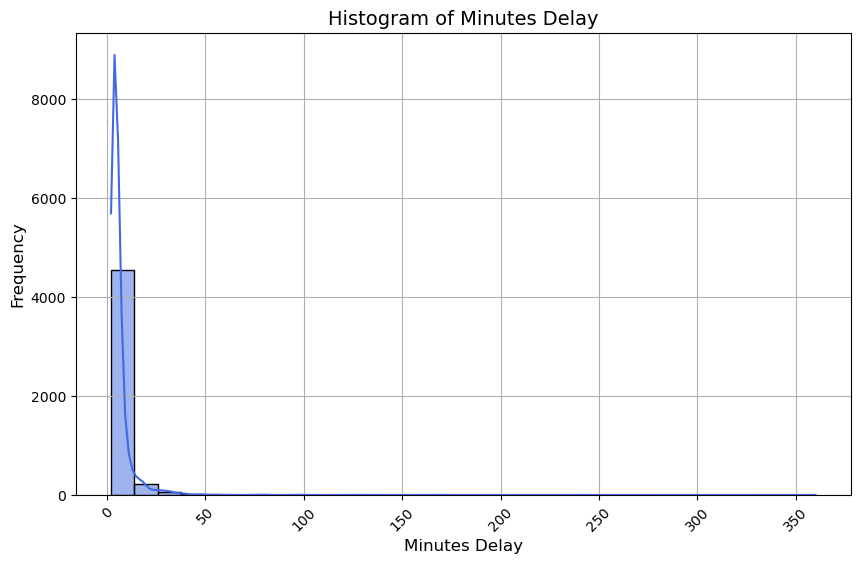

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size and style
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Min Delay'], bins=30, kde=True, color='royalblue')

# Labels and title
plt.xlabel('Minutes Delay', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of Minutes Delay', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()


In [22]:
min_value = df_cleaned['Min Delay'].min()
max_value = df_cleaned['Min Delay'].max()
delay_range = max_value - min_value

print(f"Min Delay Range: {delay_range} (from {min_value} to {max_value})")

Min Delay Range: 358 (from 2 to 360)


In [ ]:
# Find the total number of rows with minutes delay over 100 minutes 
count_over_100 = (df_cleaned['Min Delay'] > 100).sum()
print(f"Number of delays over 100 minutes: {count_over_100}")

Number of delays over 100 minutes: 8


In [ ]:
# Drop the rows with minutes delay over 100 minutes 
df = df_cleaned[df_cleaned['Min Delay'] <= 100]

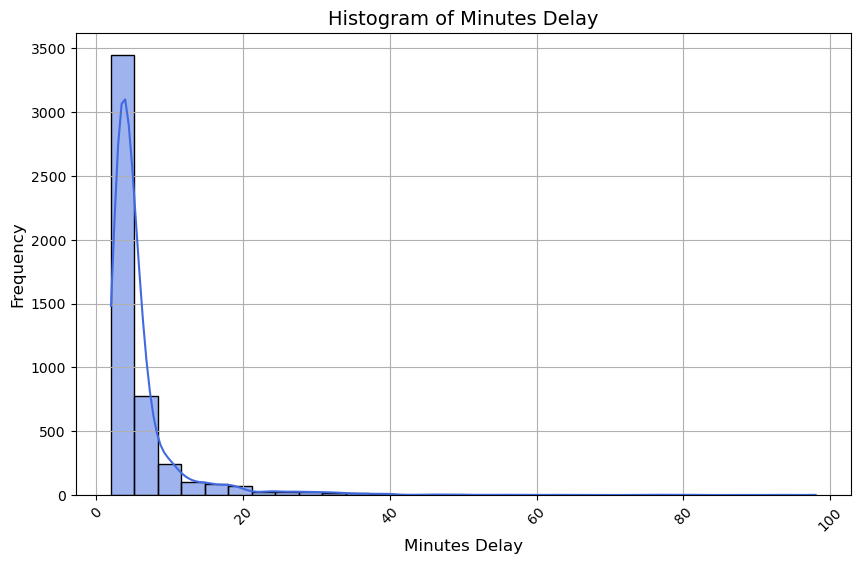

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size and style
plt.figure(figsize=(10, 6))
sns.histplot(df['Min Delay'], bins=30, kde=True, color='royalblue')

# Labels and title
plt.xlabel('Minutes Delay', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of Minutes Delay', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
# Find the correaltion between variables 
df.corr(numeric_only=True)['Min Delay'].sort_values(ascending=False)


Min Delay    1.000000
Min Gap      0.837805
Vehicle      0.071162
Name: Min Delay, dtype: float64

In [32]:
from scipy.stats import kruskal

# Grouping 'Min Delay' by 'Season'
groups = [group['Min Delay'].dropna().values for _, group in df.groupby('Season')]

# Performing Kruskal-Wallis Test
stat, p = kruskal(*groups)

# Printing Results
print(f"Kruskal-Wallis Test Statistic: {stat:.4f}")
print(f"P-value: {p:.4f}")

# Interpreting Results
alpha = 0.05
if p < alpha:
    print("Significant difference exists between seasons (Reject Null Hypothesis).")
else:
    print("No significant difference found between seasons (Fail to Reject Null Hypothesis).")


Kruskal-Wallis Test Statistic: 4.8963
P-value: 0.1796
No significant difference found between seasons (Fail to Reject Null Hypothesis).


In [33]:
from scipy.stats import kruskal

# Grouping 'Min Delay' by 'Season'
groups = [group['Min Delay'].dropna().values for _, group in df.groupby('Station')]

# Performing Kruskal-Wallis Test
stat, p = kruskal(*groups)

# Printing Results
print(f"Kruskal-Wallis Test Statistic: {stat:.4f}")
print(f"P-value: {p:.4f}")

# Interpreting Results
alpha = 0.05
if p < alpha:
    print("Significant difference exists between stations (Reject Null Hypothesis).")
else:
    print("No significant difference found between stations (Fail to Reject Null Hypothesis).")

Kruskal-Wallis Test Statistic: 68.2680
P-value: 0.0000
Significant difference exists between stations (Reject Null Hypothesis).


In [34]:
from scipy.stats import kruskal

# Grouping 'Min Delay' by 'Season'
groups = [group['Min Delay'].dropna().values for _, group in df.groupby('Day')]

# Performing Kruskal-Wallis Test
stat, p = kruskal(*groups)

# Printing Results
print(f"Kruskal-Wallis Test Statistic: {stat:.4f}")
print(f"P-value: {p:.4f}")

# Interpreting Results
alpha = 0.05
if p < alpha:
    print("Significant difference exists between days (Reject Null Hypothesis).")
else:
    print("No significant difference found between days (Fail to Reject Null Hypothesis).")

Kruskal-Wallis Test Statistic: 146.7116
P-value: 0.0000
Significant difference exists between days (Reject Null Hypothesis).


In [35]:
from scipy.stats import kruskal

# Grouping 'Min Delay' by 'Season'
groups = [group['Min Delay'].dropna().values for _, group in df.groupby('Time Period')]

# Performing Kruskal-Wallis Test
stat, p = kruskal(*groups)

# Printing Results
print(f"Kruskal-Wallis Test Statistic: {stat:.4f}")
print(f"P-value: {p:.4f}")

# Interpreting Results
alpha = 0.05
if p < alpha:
    print("Significant difference exists between time periods of a day (Reject Null Hypothesis).")
else:
    print("No significant difference found between time periods of a day (Fail to Reject Null Hypothesis).")

Kruskal-Wallis Test Statistic: 243.6943
P-value: 0.0000
Significant difference exists between time periods of a day (Reject Null Hypothesis).


In [36]:
from scipy.stats import kruskal

# Grouping 'Min Delay' by 'Season'
groups = [group['Min Delay'].dropna().values for _, group in df.groupby('Bound')]

# Performing Kruskal-Wallis Test
stat, p = kruskal(*groups)

# Printing Results
print(f"Kruskal-Wallis Test Statistic: {stat:.4f}")
print(f"P-value: {p:.4f}")

# Interpreting Results
alpha = 0.05
if p < alpha:
    print("Significant difference exists between bounds (Reject Null Hypothesis).")
else:
    print("No significant difference found between bounds (Fail to Reject Null Hypothesis).")

Kruskal-Wallis Test Statistic: 96.2002
P-value: 0.0000
Significant difference exists between bounds (Reject Null Hypothesis).
